In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [23]:
Y_train[0]

array([6], dtype=uint8)

## Loading the dataset

In [53]:
def load_dataset():
  #load dataset
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)
  #one hot encoding target variables
  y_train = to_categorical(y_train)
  y_val = to_categorical(y_val)
  y_test = to_categorical(y_test)
  print('x_train: ', x_train.shape, 'y_train: ', y_train.shape)
  print('x_val: ', x_val.shape, 'y_val: ', y_val.shape)
  print('x_test: ', x_test.shape, 'y_test: ', y_test.shape)
  return x_train, y_train, x_val, y_val, x_test, y_test
  

In [55]:
x_train, y_train, x_val, y_val, x_test, y_test = load_dataset()

x_train:  (35000, 32, 32, 3) y_train:  (35000, 10)
x_val:  (15000, 32, 32, 3) y_val:  (15000, 10)
x_test:  (10000, 32, 32, 3) y_test:  (10000, 10)


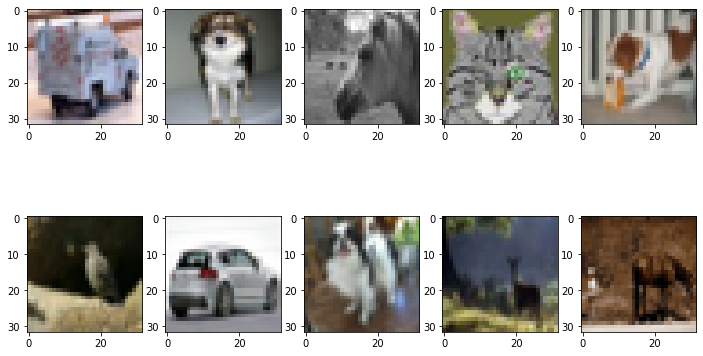

In [61]:
# plot first few images
fig = plt.figure(figsize=(12,7))
for i in range(10):
  # define subplot
	plt.subplot(2, 5, i+1)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

##Rescaling images

In [56]:
def normalize_pixel(train_data,validation_data, test_data):
  # converting into floating type
  train_normalized = train_data.astype('float32')
  validation_normalized = validation_data.astype('float32')
  test_normalized = test_data.astype('float32')
  # rescaling images
  train_normalized = train_normalized / 255.0
  validation_normalized = validation_normalized / 255.0
  test_normalized = test_normalized / 255.0
  return train_normalized, validation_normalized, test_normalized

In [ ]:
# train_norm, val_norm, test_norm = normalize_pixel()

In [46]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	pyplot.close()

In [59]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

In [60]:
validation_data_gen = ImageDataGenerator(rescale = 1./255)
test_data_gen = ImageDataGenerator(rescale = 1./255)